# Principal Component Analysis with Cancer Data

In [78]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [80]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt',header=None)

In [81]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [82]:
df.columns=['Sample code number', 'Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [83]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [32]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [51]:
df.shape

(698, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [85]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [86]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [130]:
df ['Bare Nuclei'] = df ['Bare Nuclei'] .astype('int64')

In [131]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [37]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

In [87]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
df.replace('?', 1, inplace=True)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [132]:
# Check for correlation of variable
df.corr()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.049523,-0.080226
Clump Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.407423,0.716001
Uniformity of Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.507093,0.817904
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.478072,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.475887,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.495912,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.434664,0.818968
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.392929,0.756616
Normal Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.479943,0.712244
Mitoses,-0.049523,0.407423,0.507093,0.478072,0.475887,0.495912,0.434664,0.392929,0.479943,1.000000,0.504510


In [40]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

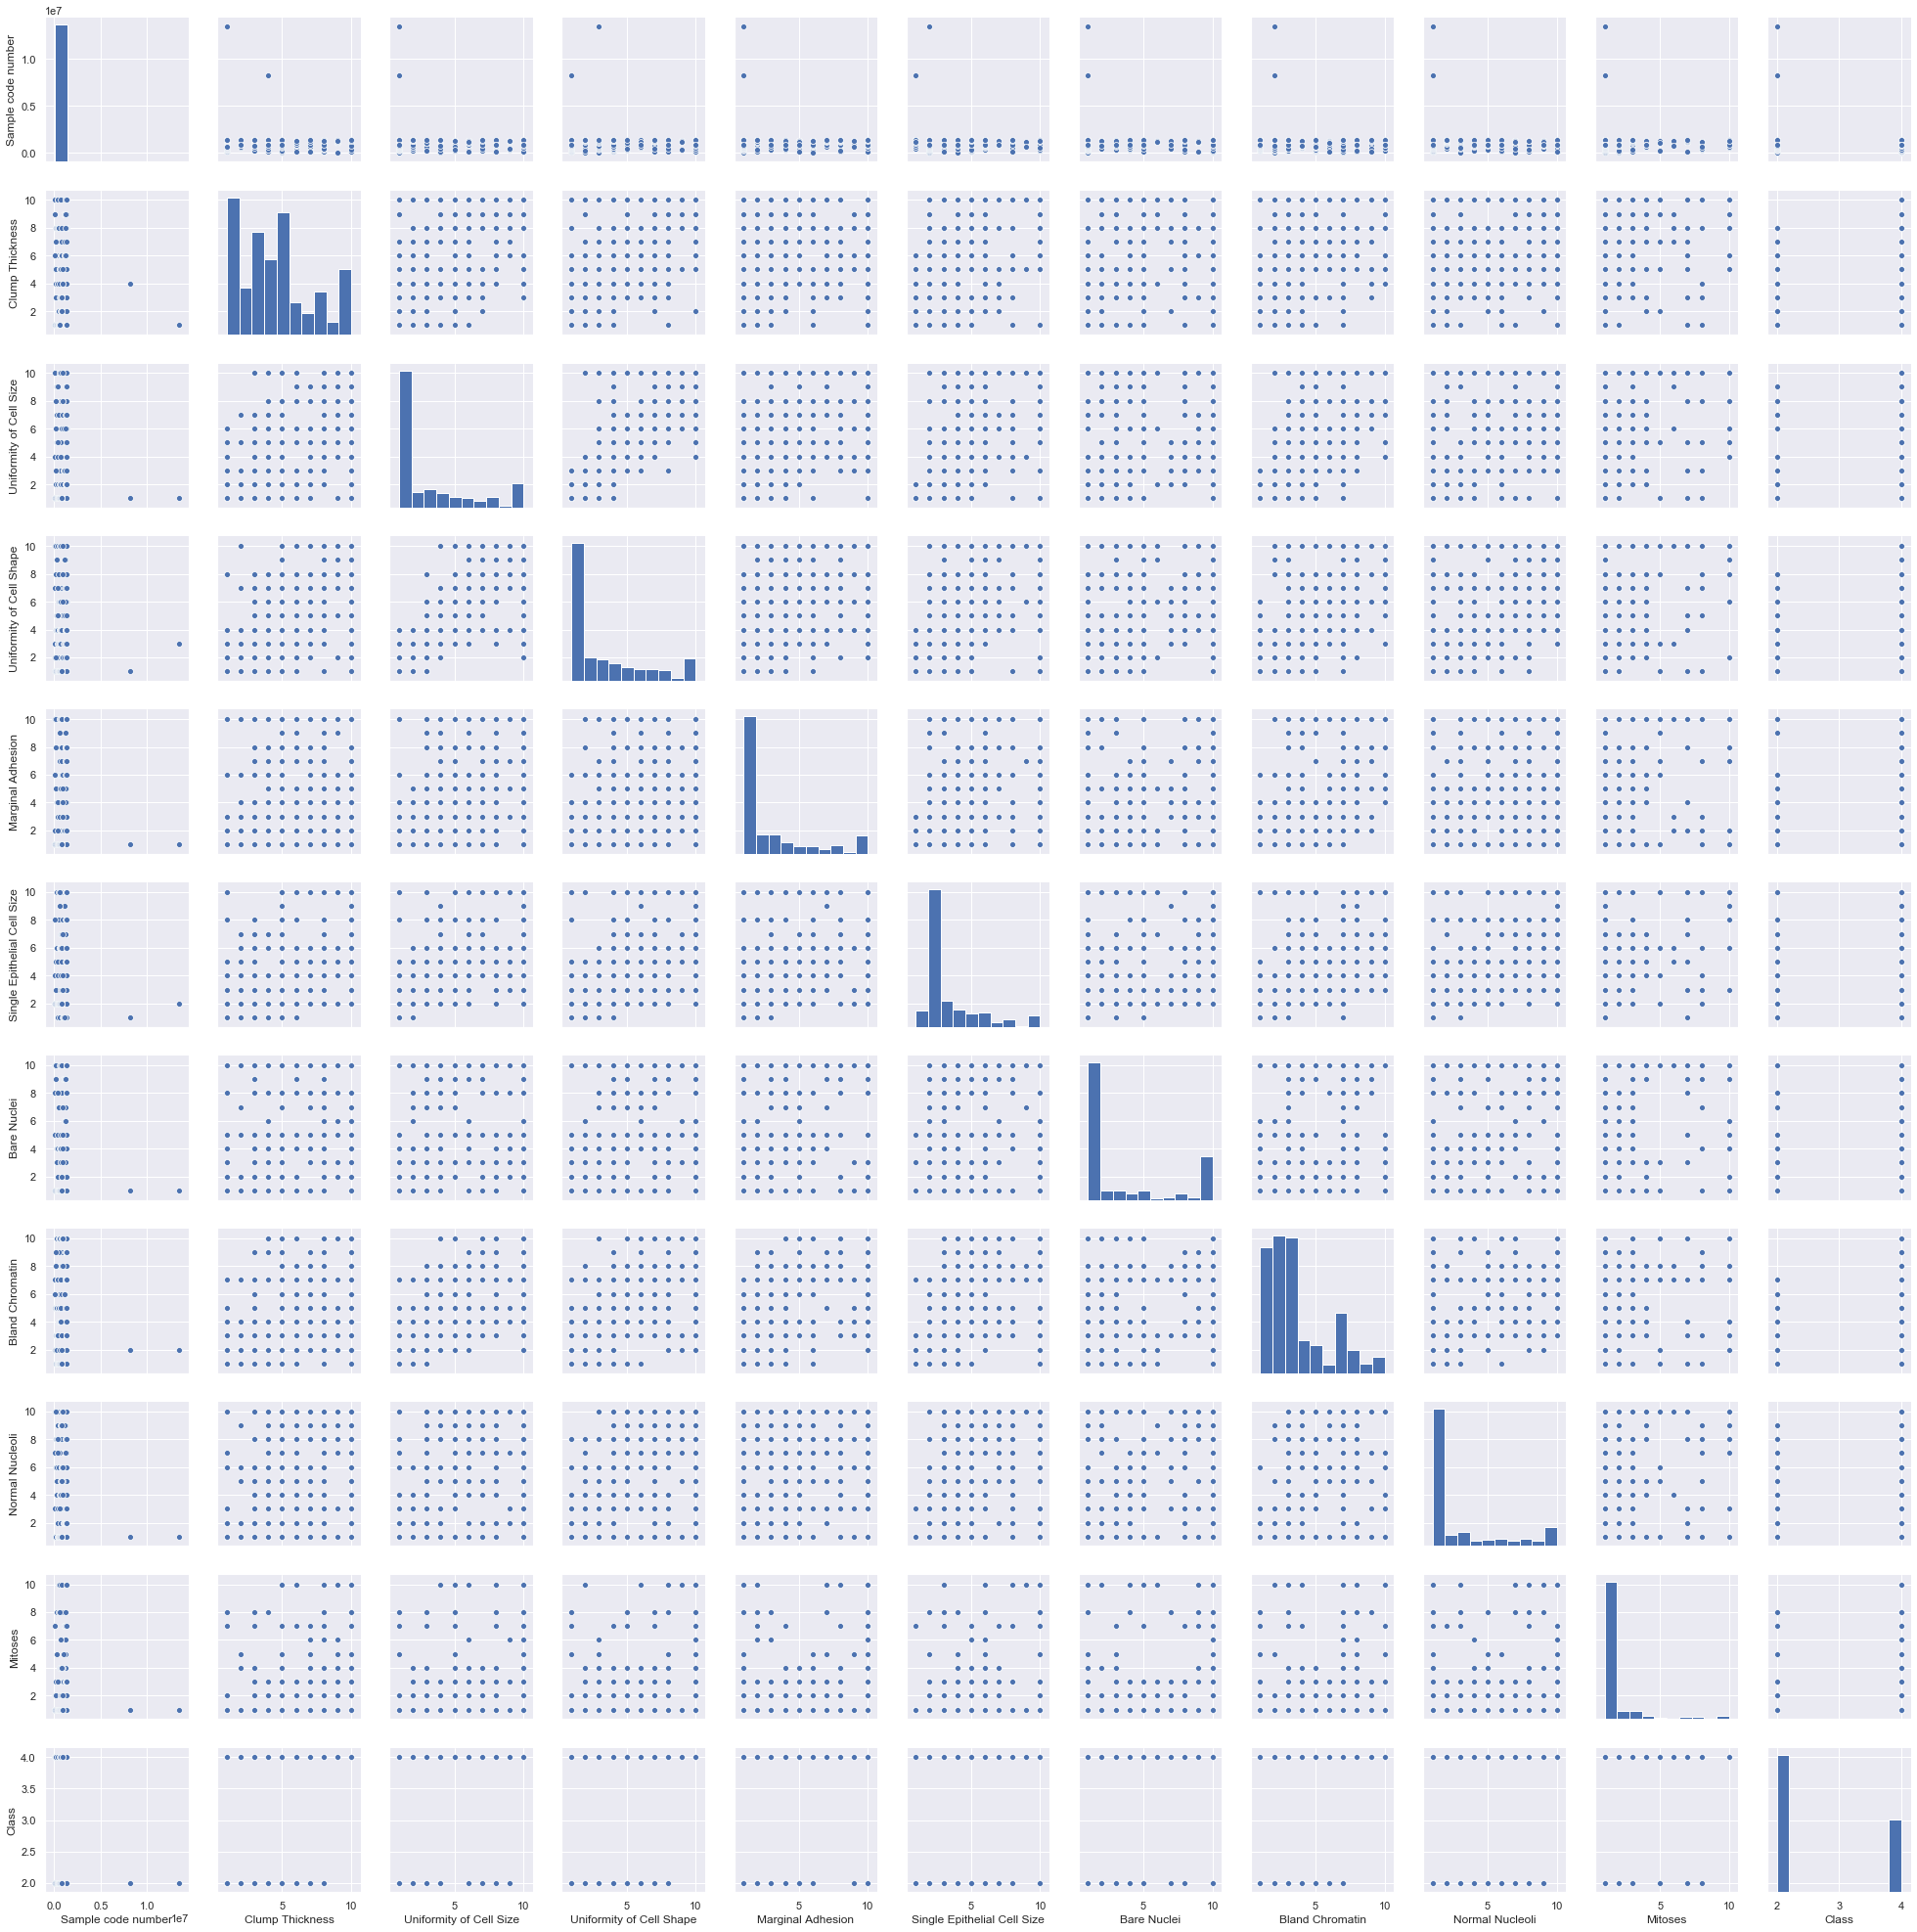

In [76]:
sns.pairplot(df)

In [134]:
df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

In [94]:
df.drop(['Sample code number'],axis=1)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [95]:
y=df['Class']

In [135]:
new_df = df.drop(['Class','Sample code number'],axis=1)

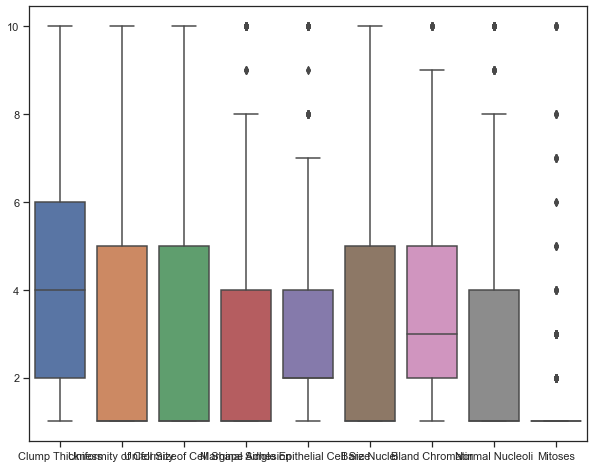

In [105]:

sns.set_style('ticks')
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
sns.boxplot(data=new_df,ax=ax)

In [111]:
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print('----------------------------')
print(Q1)
print('---------------------------')
print(Q3)
for i in the range(len(new_df['Clump Thickness'])):
    
    

Clump Thickness                4.0
Uniformity of Cell Size        4.0
Uniformity of Cell Shape       4.0
Marginal Adhesion              3.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    4.0
Bland Chromatin                3.0
Normal Nucleoli                3.0
Mitoses                        0.0
dtype: float64
----------------------------
Clump Thickness                2.0
Uniformity of Cell Size        1.0
Uniformity of Cell Shape       1.0
Marginal Adhesion              1.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    1.0
Bland Chromatin                2.0
Normal Nucleoli                1.0
Mitoses                        1.0
Name: 0.25, dtype: float64
---------------------------
Clump Thickness                6.0
Uniformity of Cell Size        5.0
Uniformity of Cell Shape       5.0
Marginal Adhesion              4.0
Single Epithelial Cell Size    4.0
Bare Nuclei                    5.0
Bland Chromatin                5.0
Normal Nucleoli           

In [115]:
#As the lower limit and the upper limit is same for the column mitosis we will be treating the same
pd.crosstab(index=df['Mitoses'],columns=df['Class'])

Class,2,4
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [123]:
df['Mitoses'].values[df['Mitoses'] > 4] = 4

In [124]:
df['Mitoses'].value_counts()

1    579
4     52
2     35
3     33
Name: Mitoses, dtype: int64

# Q6 Create a covariance matrix for identifying Principal components

In [2]:
# PCA
# Step 1 - Create covariance matrix


In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaling_var = scaler.fit(new_df)
transform_var = scaler.transform(new_df)

In [139]:
cov_var = np.cov(transform_var)

In [140]:
print(cov_var)

[[ 0.09652219 -0.08051826  0.02836513 ... -0.09544626 -0.01781712
  -0.04703807]
 [-0.08051826  0.66487614 -0.01168041 ... -0.31229997 -0.29465739
  -0.11975845]
 [ 0.02836513 -0.01168041  0.03028298 ... -0.05017103  0.0373994
   0.02433923]
 ...
 [-0.09544626 -0.31229997 -0.05017103 ...  1.06806425  0.62008876
   0.54364548]
 [-0.01781712 -0.29465739  0.0373994  ...  0.62008876  0.99176837
   0.91080701]
 [-0.04703807 -0.11975845  0.02433923 ...  0.54364548  0.91080701
   0.97395608]]


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [141]:
e,v=np.linalg.eig(cov_var.T)


In [142]:
print(e,v)

[ 6.37968200e+01+0.00000000e+00j  4.78190015e+01+0.00000000e+00j
  4.23868967e+01+0.00000000e+00j  3.36479046e+01+0.00000000e+00j
  2.67480140e+01+0.00000000e+00j  2.51576941e+01+0.00000000e+00j
  2.37638831e+01+0.00000000e+00j  7.75201597e+00+0.00000000e+00j
  6.23802488e-15+0.00000000e+00j -5.08135037e-15+0.00000000e+00j
  9.53790979e-16+3.80682213e-15j  9.53790979e-16-3.80682213e-15j
  3.14957510e-15+2.08556718e-15j  3.14957510e-15-2.08556718e-15j
  3.60752600e-15+7.86313218e-16j  3.60752600e-15-7.86313218e-16j
 -2.27507304e-15+3.24631680e-15j -2.27507304e-15-3.24631680e-15j
 -8.90643847e-16+3.45406116e-15j -8.90643847e-16-3.45406116e-15j
 -1.73104677e-16+3.04450974e-15j -1.73104677e-16-3.04450974e-15j
  1.31863498e-15+2.46322703e-15j  1.31863498e-15-2.46322703e-15j
 -2.90588158e-15+7.80366420e-16j -2.90588158e-15-7.80366420e-16j
 -2.67474296e-15+1.26448190e-15j -2.67474296e-15-1.26448190e-15j
 -1.96529897e-15+2.05776988e-15j -1.96529897e-15-2.05776988e-15j
 -2.85976081e-15+0.000000

# Q8 Find variance and cumulative variance by each eigen vector

In [147]:
print(e/(e.sum()))
print(np.cumsum(e/(e.sum())))

[ 2.35349892e-01-1.78717016e-033j  1.76406862e-01-1.33957606e-033j
  1.56367536e-01-1.18740397e-033j  1.24128925e-01-9.42594491e-034j
  9.86748588e-02-7.49304629e-034j  9.28080834e-02-7.04754254e-034j
  8.76662397e-02-6.65708774e-034j  2.85976028e-02-2.17160850e-034j
  2.30124085e-17-1.74748709e-049j -1.87453741e-17+1.42346245e-049j
  3.51858609e-18+1.40435711e-017j  3.51858609e-18-1.40435711e-017j
  1.16189515e-17+7.69376922e-018j  1.16189515e-17-7.69376922e-018j
  1.33083570e-17+2.90075165e-018j  1.33083570e-17-2.90075165e-018j
 -8.39286652e-18+1.19758368e-017j -8.39286652e-18-1.19758368e-017j
 -3.28563293e-18+1.27422169e-017j -3.28563293e-18-1.27422169e-017j
 -6.38592442e-19+1.12313598e-017j -6.38592442e-19-1.12313598e-017j
  4.86451517e-18+9.08697665e-018j  4.86451517e-18-9.08697665e-018j
 -1.07199530e-17+2.87881359e-018j -1.07199530e-17-2.87881359e-018j
 -9.86727029e-18+4.66474155e-018j -9.86727029e-18-4.66474155e-018j
 -7.25009335e-18+7.59122348e-018j -7.25009335e-18-7.59122348e-

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [148]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=8)
pca.fit(transform_var)
x_pca = pca.transform(transform_var)


In [149]:
pca.explained_variance_

array([5.96647287, 0.69279683, 0.54141562, 0.48197983, 0.3846101 ,
       0.30655033, 0.28811644, 0.26237544])

In [150]:
pca.components_

array([[ 0.30151106,  0.37851541,  0.37449107,  0.33132033,  0.33318486,
         0.3331899 ,  0.34345864,  0.33399206,  0.25349211],
       [-0.12639826, -0.08708794, -0.1358317 , -0.00978019,  0.10496457,
        -0.16868387, -0.27425001,  0.02369002,  0.91795816],
       [-0.86705337,  0.03750598, -0.01835348,  0.38743605,  0.15969222,
        -0.05974714,  0.18519986,  0.15641858, -0.09236412],
       [ 0.01780862, -0.20223761, -0.17469911,  0.47602586, -0.43602621,
         0.57048661,  0.08097205, -0.39567124,  0.15157957],
       [-0.04315703,  0.11862498,  0.08872954,  0.02641433,  0.65198464,
         0.14441156, -0.26788845, -0.67031557, -0.09202767],
       [ 0.28266251,  0.10106559,  0.03268289,  0.68474417, -0.09128167,
        -0.60323562, -0.22304297, -0.08430133, -0.10423272],
       [-0.03172061,  0.1921976 ,  0.1039453 , -0.16697695, -0.15204919,
        -0.36723177,  0.69732295, -0.4896845 ,  0.19834219],
       [ 0.24131609, -0.45280196, -0.58996605,  0.1192403 ,  0

# Q10 Find correlation between components and features

In [152]:
corr_df = pd.DataFrame(pca.components_)
corr_df.columns = new_df.columns
corr_df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.301511,0.378515,0.374491,0.331320,0.333185,0.333190,0.343459,0.333992,0.253492
1,-0.126398,-0.087088,-0.135832,-0.009780,0.104965,-0.168684,-0.274250,0.023690,0.917958
2,-0.867053,0.037506,-0.018353,0.387436,0.159692,-0.059747,0.185200,0.156419,-0.092364
3,0.017809,-0.202238,-0.174699,0.476026,-0.436026,0.570487,0.080972,-0.395671,0.151580
4,-0.043157,0.118625,0.088730,0.026414,0.651985,0.144412,-0.267888,-0.670316,-0.092028
5,0.282663,0.101066,0.032683,0.684744,-0.091282,-0.603236,-0.223043,-0.084301,-0.104233
6,-0.031721,0.192198,0.103945,-0.166977,-0.152049,-0.367232,0.697323,-0.489685,0.198342
7,0.241316,-0.452802,-0.589966,0.119240,0.449212,-0.078522,0.392713,0.100429,-0.046817


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [221]:
joke_df = pd.read_csv('jokes.csv')

In [222]:
joke_df.shape

(24983, 101)

In [223]:
joke_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [224]:
ratings = joke_df.head(200)
ratings = joke_df.drop(['NumJokes'],axis=1)

# Q13 Change the column indices from 0 to 99

In [225]:
ratings.columns=range(0,100)

# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [226]:
ratings.replace(99.00,0,inplace=True)

# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ratings)
transform_var = scaler.transform(ratings)
ratings_diff = pd.DataFrame(transform_var)

ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.994883,1.808647,-2.238521,-1.728763,-1.507804,-2.191269,-1.714352,0.972648,-2.100627,-1.260430,...,0.615141,-0.142508,-0.316493,-0.143678,-0.127407,-0.197260,-1.883245,-0.092466,0.003988,-0.158168
1,0.825933,-0.092487,1.394499,1.257092,-0.529682,-2.450540,-0.054678,-0.956808,2.247283,1.767946,...,0.615141,-1.653101,-0.408176,2.213438,-0.184104,-0.862832,0.700170,0.003456,-1.258848,0.155726
2,-0.141204,-0.031768,-0.047824,0.215736,1.641597,1.780490,1.721464,2.007371,0.085501,-0.229309,...,-0.239054,-0.142508,-0.316493,2.579301,-0.127407,-0.197260,-0.209525,-0.092466,0.003988,-0.158168
3,-0.141204,1.716521,-0.047824,0.215736,0.265756,1.532394,-0.435020,1.386537,0.085501,0.169275,...,-0.239054,-0.142508,-0.316493,0.015262,-0.127407,-0.197260,-0.209525,-0.092466,0.003988,-0.158168
4,1.873665,0.933455,-0.993497,-1.068682,0.182026,0.066174,1.359321,1.061918,-0.021615,1.011935,...,1.333028,1.560344,1.033455,1.412738,1.582462,0.284813,0.715034,1.755437,0.530170,0.311206


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [229]:
mean_var = pd.DataFrame(ratings_diff.mean(axis=0))
print(mean_var)

               0
0   8.313741e-16
1  -3.998989e-16
2  -1.384413e-16
3   3.778838e-16
4  -2.355274e-17
..           ...
95 -6.375617e-16
96 -1.599291e-15
97  7.411726e-16
98  7.135308e-16
99  3.571640e-16

[100 rows x 1 columns]


# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [230]:
print(mean_var.nlargest(10,mean_var[:]))

               0
70  4.527708e-15
23  3.224277e-15
74  1.710754e-15
8   1.700019e-15
51  1.506442e-15
92  8.999415e-16
66  8.358824e-16
63  8.345759e-16
0   8.313741e-16
83  7.954728e-16
